# General Concepts

  Prior to this class I had already have had a long standing interest in AI. I have done some simple models in the past and even followed tutorials for creating LSTMs. However this class gave me a new perspective I did not learn in books or online articles.

  Probably one of the coolest concepts learned earlier in the course was recent research being done to combine Symbolic AI with ML (https://www.sciencedirect.com/science/article/pii/S2352154618301943). I did research with expert systems for telling kids stories so I found that quite interesting.

## How is Machine Learning different from AI?
  Machine Learning is a subfield of AI although many use the terms to mean the other. The best way to characterize ML is that in good ol fashion AI you gave the machines the rules and it would map the input to output based on the rules you set beforehand. This had many drawbacks with the main one being how unruly these systems would become when scaled over time with additional rules. They would often be difficult to debug too. Machine Learning however merely takes in the input and output and will figure out the "rules" of the data on its own. While oftentimes this might mean it is a blackbox how the ML Model is connected. This does result in accurate more scalable models. However it remains to be seen if Machine Learning is just a trend or what the future of aritifical general intelligence will end up being. 


  ## Additional Concepts learned.

While I was fluent in Python before coming to class. This course increased my knowledge of various libaries found in ML. I had only ever touched **Tensorflow**, **Keras**, **matplotlib**, or **numpy**. Each of these packages serve a very unique usecase in the Machine Learning stack and I am glad I got more exposure to each of them. Specfically numpy. Numpy proved to be extremely powerful and I included an example from the HW using the mnist dataset and numpy to average all the digits together

Using TensorFlow backend.


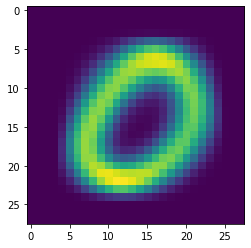

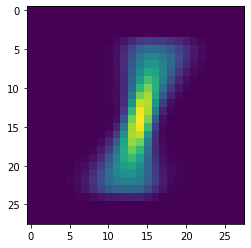

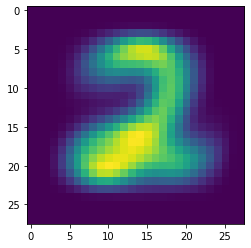

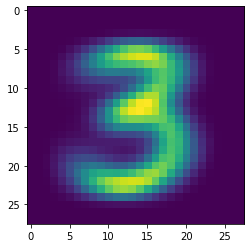

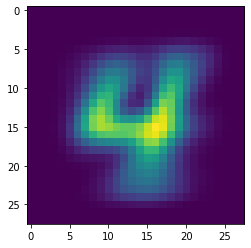

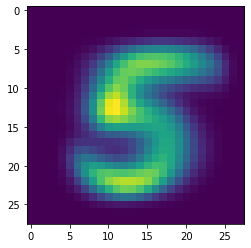

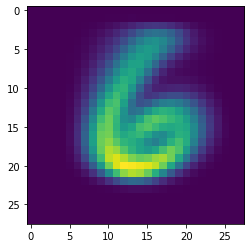

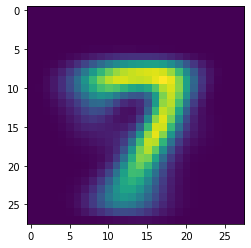

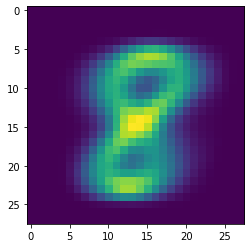

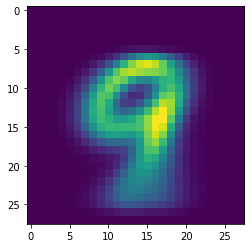

In [1]:
# Import our libraries
from keras.datasets import mnist
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# Load our dataset
(train_images_2, train_labels_2), (test_images_2, test_labels_2) = mnist.load_data()

# Init the variables we need for cleaning and processing the data
label_ranges = {0:[], 1:[], 2:[], 3:[], 4:[], 5:[], 6:[], 7:[], 8:[], 9:[]}
dataset_cleaned = {0:[], 1:[], 2:[], 3:[], 4:[], 5:[], 6:[], 7:[], 8:[], 9:[]}
output = [0 for i in range(10)]


for i in range(len(train_labels_2)):
  label_ranges[train_labels_2[i]].append(i)
  
for i in range(10):
  output[i] = np.zeros((28, 28, len(label_ranges[i])), dtype=train_images_2.dtype)
  
# Clean and sort our data into a python dict for later processing. 
# Each digit is separated into its own list
for j in range(10):
  for i in range(len(label_ranges[j])):
    dataset_cleaned[j].append(train_images_2[label_ranges[j][i]])
    
# Stack the data into a 3D Array and grab the average
# Plot the data after processing it
for j in range(10):
  for i in range(len(dataset_cleaned[j])):
    output[j] = np.dstack((output[j], dataset_cleaned[j][i]))
    
  plt.imshow(np.average(output[j], axis=2))
  plt.show()

# Building a model

While we mainly built image models in this class, my passion is for Natural Language Processing so I used this class as a way to movtivate myself to learn more about the field of NLP and how RNNs/LSTMs are constructed. While RNNs are inherently very complex and far more difficult to explain then a feedforward neural network such as the models we have worked on in class. From my understanding RNNs perform very way on sequential data which is why they do so well on language tasks. 

The reason they perform so well is because of their ability to feedback previous output as an additional input. This feedback loop can help inform the next output, etc. This is why an RNN might be able to pick up common language patterns. However one shortcoming of RNNs is their lack of ability to store this information over long stretches of training. This is where LSTMs (Long Short Term Memory) come to correct this issue. The main inutition behind LSTMs is that they help keep relevant information from the data and thus help train the network in espeically long sequences of data.

(This article provides a much more detailed explanation: https://towardsdatascience.com/illustrated-guide-to-lstms-and-gru-s-a-step-by-step-explanation-44e9eb85bf21)

In [2]:
# Basic LSTM in Tensorflow
import numpy
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM
from keras.callbacks import ModelCheckpoint
from keras.utils import np_utils
model = Sequential()
model.add(LSTM(256, input_shape=(28, 28), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(256))
model.add(Dropout(0.2))
model.add(Dense(28, activation='softmax'))





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


test_loss=[23.38783031]
b=[4.53404954]


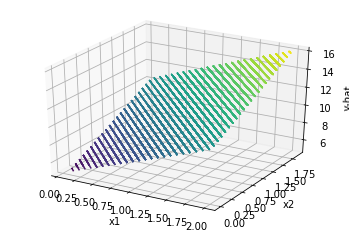

In [3]:
# Linear Regression is also a fun model to build or tinker with so it was fun to see it as one of the first homework assignments

from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# Our dataset
x1 = 2 * np.random.rand(100,1)
x2 = 2 * np.random.rand(100,1)
ys = 4 + (3 * x1 + 3 * x2) + np.random.rand(100,1)

# Our test dataset including labels
test_x1 = x1[80:]
test_x2 = x2[80:] 
test_ys = ys[80:]

# Our training dataset
train_x1 = x1[:80]
train_x2 = x2[:80]
train_ys = ys[:80]

# number of epochs
epochs = 100
# learning rate
lr = 0.02

# # initial value for our 2 weights and bias b
w1 = np.random.randn(1)
w2 = np.random.randn(1)
b = np.zeros(1)

# Training phase
for epoch in np.arange(epochs):
  for i in np.arange(80):
    # Prediction value
    y_pred =(w1 * train_x1[i] + w2 * train_x2[i]) + b

    # Update weights
    grad_w = (y_pred - train_ys[i]) 
    grad_w1 = grad_w * train_x1[i]
    grad_w2 = grad_w * train_x2[i]
    grad_b = grad_w

    # Update weights
    w1 -= lr * grad_w1
    w2 -= lr * grad_w2
    b  -= lr * grad_b
    
    
test_loss = 0
for i in np.arange(20):
  test_loss += 0.5 * (w1 * test_x1[i] + w2 * test_x2[i]) ** 2
test_loss /= 20
print(f"test_loss={test_loss}")


X1, X2 = np.meshgrid(test_x1, test_x2)
Y_hat = (w1 * X1 + w2 * X2) + b
print(f"b={b}")

# Prepare the figure for plotting and plot
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X1, X2, Y_hat, 50, cmap='viridis')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y-hat')
plt.show()

# Compiling a model

The field of optimizers, loss functions, and metrics is an entire can of worms separate to ML entirely. Yet those fields inform and help so much of the research being done in Machine Learning. Luckily for us Tensorflow/Keras make it very easy to use all these optimizers, loss functions, and metrics. If you were to become an ML Engineer knowing the purpose all of these have is KEY.



In [4]:
# Trying out different compiler configurations
import tensorflow as tf
from tensorflow import keras
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras import optimizers, layers, models
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np

(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
train_images = train_images / 255.0
test_images = test_images / 255.0

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

model_2 = models.Sequential()
model_2.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model_2.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model_2.add(layers.MaxPooling2D((2, 2)))
model_2.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model_2.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model_2.add(layers.MaxPooling2D(2, 2))
model_2.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model_2.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model_2.add(layers.MaxPooling2D(2, 2))
model_2.add(layers.Flatten())
model_2.add(layers.Dropout(0.4))
model_2.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model_2.add(layers.Dense(10, activation='softmax'))

model_2.compile(
    optimizer='adam', 
    loss='mean_squared_error', 
    metrics=['accuracy']
)

In [5]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Flatten())
model.add(layers.Dropout(0.4))
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(layers.Dense(10, activation='softmax'))

opt = optimizers.SGD(lr=0.001, momentum=0.9)
model.compile(
    optimizer=opt, 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
)

# Training a model

Training the model! Most important step in ML. With training comes challenges such as **Overfitting** when you perform well on your training dataset but not on testing data or **Underfitting** when you perform poorly on both.

You can combat Overfitting by tweaking your model or using Dropout to help remove deep rooted connections in your model so they dont bias it too much.

The idea behind dropout is insanely simple but crazy good! In a lot of ways Dropout is similar to fighting bias in the human mind. 

In [0]:
epochs = 20
history = model.fit(
    train_images, 
    train_labels, 
    epochs=epochs, 
    batch_size=64,
    verbose=1,
    validation_data=(test_images, test_labels)
)
history_dict = history.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs+1)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 50000 samples, validate on 10000 samples
Epoch 1/20





50000/50000 [==============================] - 335s 7ms/step - loss: 1.8707 - acc: 0.3134 - val_loss: 1.5371 - val_acc: 0.4348
Epoch 2/20
10048/50000 [=====>........................] - ETA: 4:18 - loss: 1.6082 - acc: 0.4125

In [0]:
plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [0]:
acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']

In [0]:
plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Fin

Thank you for reading my notebook. I deeply enjoyed and honestly being in the class encouraged me to learn more *outside* of it. I have spent much of this semester reading books like: Data Science From Scratch or Hands-On Machine Learning. I havent consumed great podcasts such as Aritifical Intelligence by lex Freidman and Machine Learning Bytes. Being in an AI class at UCF resparked my initial joy which got me interested in the field years ago. 